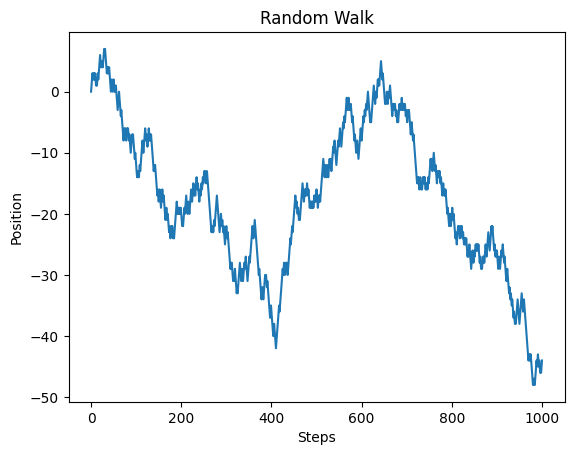

In [1]:
# 4.7 Examples: Random Walks

import numpy as np
import matplotlib.pyplot as plt
#! blockstart
import random

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) == 0 else -1
    # step = random.choice([-1, 1])
    position += step
    walk.append(position)
#! blockend
plt.plot(walk)
plt.title("Random Walk")
plt.xlabel("Steps")
plt.ylabel("Position")
plt.show()
# The code above simulates a random walk, where at each step the position can either increase or decrease by 1.

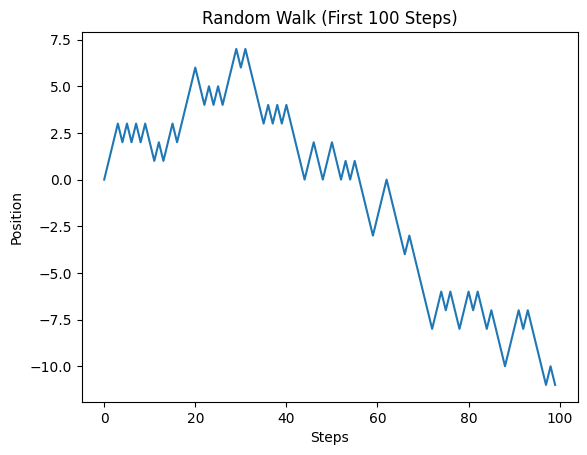

In [2]:
plt.plot(walk[:100])
plt.title("Random Walk (First 100 Steps)")
plt.xlabel("Steps")
plt.ylabel("Position")
plt.show()

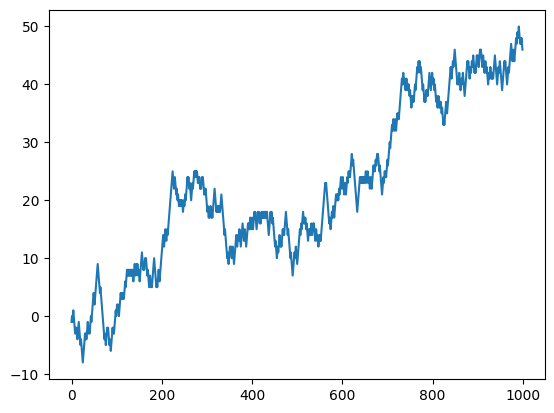

In [3]:
steps = 1000
rng = np.random.default_rng(seed=12345) # Random number generator
draw = rng.integers(0, 2, size=steps) # Random integers between 0 and 1
steps = np.where(draw == 0, 1, -1) # Convert to steps of +1 or -1
walk = steps.cumsum() # Cumulative sum to get position
plt.plot(walk)

In [4]:
walk.min() # Minimum position

np.int64(-8)

In [5]:
walk.max() # Maximum position

np.int64(50)

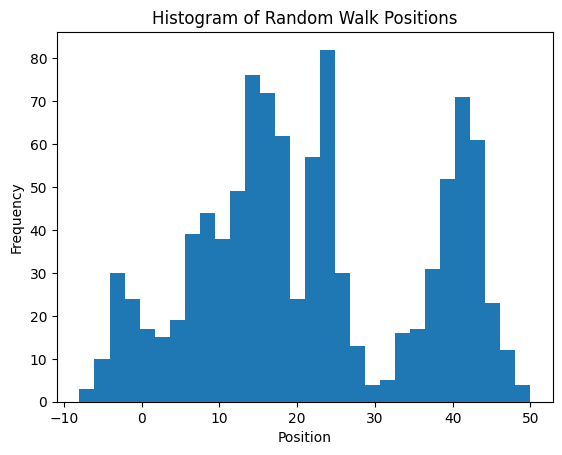

In [6]:
plt.hist(walk, bins=30) # Histogram of positions
plt.title("Histogram of Random Walk Positions")     
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.show()
# The histogram shows the distribution of positions after 1000 steps in the random walk.

In [7]:
(np.abs(walk) >= 10).argmax() # First index where the absolute position is greater than or equal to 10
# This gives the first step at which the random walk reaches a position of 10 or -10.


np.int64(155)

In [8]:
# Simulating Many Random Walks at Once
# Simulating multiple random walks at once can provide insights into the behavior of random walks over time.
# This can be done by creating a 2D array where each row represents a different random walk.    

walk= 5000 # Number of random walks
steps = 1000 # Number of steps in each walk
draw = rng.integers(0, 2, size=(walk, steps)) # Random integers between 0 and 1
steps = np.where(draw > 0, 1, -1) # Convert to steps of +1 or -1
walk = steps.cumsum(axis=1) # Cumulative sum to get position
walk 

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]], shape=(5000, 1000))

In [9]:
walk.max() # Maximum position

np.int64(114)

In [10]:
walk.min(), walk.max()
# Minimum and maximum positions across all walks

(np.int64(-120), np.int64(114))

In [11]:
hits30 = (np.abs(walk) >= 30).any(axis=1) # Check if any walk reaches 30 or -30
hits30 # Number of walks that reached 30 or -30

array([False,  True,  True, ...,  True, False,  True], shape=(5000,))

In [12]:
hits30.sum() # Total number of walks that reached 30 or -30
# The sum of the boolean array gives the total number of walks that reached a position of 30 or -30.

np.int64(3395)

In [13]:
crossing_time = (np.abs(walk) >= 30).argmax(axis=1) 
# First index where the absolute position is greater than or equal to 30
crossing_time # Crossing time for each walk


array([  0, 201, 491, ..., 259,   0, 541], shape=(5000,))

In [14]:
crossing_time1 = (np.abs(walk[hits30]) >= 30).argmax(axis=1)
crossing_time1 
# Crossing time for walks that reached 30 or -30


array([201, 491, 283, ..., 219, 259, 541], shape=(3395,))

In [15]:
crossing_time.mean() # Average crossing time for all walks


np.float64(339.887)

In [16]:
crossing_time1.mean() # Average crossing time for walks that reached 30 or -30

np.float64(500.5699558173785)

In [17]:
# The mean of the crossing times gives the average time it took for each walk to reach a position of 30 or -30.
# This can be useful for understanding the behavior of random walks over time.
# Standard deviation of crossing times for walks that reached 30 or -30 
# Standard deviation of crossing times for all walks
crossing_time.std(), crossing_time1.std()

(np.float64(306.26128816910574), np.float64(240.21936718301168))

In [18]:
walk1 = 5000 # Number of random walks
steps1 = 1000  # Number of steps in each walk
draw1 = 0.25 * rng.standard_normal(size=(walk1, steps1)) # Random normal variables
# Random normal variables
draw1  
# Standard normal random variables scaled by 0.25



array([[-0.04049737, -0.72203015, -0.25774138, ...,  0.42355751,
        -0.67303006, -0.41968018],
       [-0.04384188, -0.35375729,  0.27860676, ...,  0.01100176,
        -0.00527772, -0.08297507],
       [ 0.35227417, -0.35383118,  0.09818312, ..., -0.02725589,
        -0.04007853, -0.09849703],
       ...,
       [ 0.22455202, -0.12520673, -0.02435565, ..., -0.19437209,
        -0.20666754,  0.16508676],
       [-0.04544783,  0.2540093 , -0.298138  , ...,  0.467853  ,
         0.03529931, -0.18926481],
       [-0.10790612, -0.11282332, -0.05788132, ...,  0.11783678,
        -0.03052947,  0.18259634]], shape=(5000, 1000))

In [19]:
draw1.cumsum(axis=1) # Cumulative sum to get position
# Cumulative sum to get position    

array([[-4.04973719e-02, -7.62527517e-01, -1.02026889e+00, ...,
        -1.57507772e+00, -2.24810778e+00, -2.66778796e+00],
       [-4.38418762e-02, -3.97599167e-01, -1.18992406e-01, ...,
        -1.31018513e+01, -1.31071290e+01, -1.31901041e+01],
       [ 3.52274172e-01, -1.55700584e-03,  9.66261120e-02, ...,
         4.66852443e+00,  4.62844590e+00,  4.52994887e+00],
       ...,
       [ 2.24552019e-01,  9.93452851e-02,  7.49896359e-02, ...,
         1.31353550e+00,  1.10686796e+00,  1.27195472e+00],
       [-4.54478268e-02,  2.08561476e-01, -8.95765267e-02, ...,
        -9.07957357e+00, -9.04427426e+00, -9.23353907e+00],
       [-1.07906122e-01, -2.20729440e-01, -2.78610755e-01, ...,
         6.10293202e+00,  6.07240255e+00,  6.25499890e+00]],
      shape=(5000, 1000))